# Demo 11

In [1]:
import pandas as pd
import numpy as np
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

## Mallet

In [3]:
!which mallet

/opt/conda/bin/mallet


**Question:** Set the variable `path_to_mallet` to where mallet is stored on your server

In [4]:
path_to_mallet = '/opt/conda/bin/mallet'
path_to_mallet

'/opt/conda/bin/mallet'

In [6]:
!mallet

Unrecognized command: 
Mallet 2.0 commands: 

  import-dir         load the contents of a directory into mallet instances (one per file)
  import-file        load a single file into mallet instances (one per line)
  import-svmlight    load SVMLight format data files into Mallet instances
  info               get information about Mallet instances
  train-classifier   train a classifier from Mallet data files
  classify-dir       classify data from a single file with a saved classifier
  classify-file      classify the contents of a directory with a saved classifier
  classify-svmlight  classify data from a single file in SVMLight format
  train-topics       train a topic model from Mallet data files
  infer-topics       use a trained topic model to infer topics for new documents
  evaluate-topics    estimate the probability of new documents under a trained model
  prune              remove features based on frequency or information gain
  split              divide data into testing, tr

In [7]:
!mallet info

A tool for printing information about instance lists of feature vectors.
--help TRUE|FALSE
  Print this command line option usage information.  Give argument of TRUE for longer documentation
  Default is false
--prefix-code 'JAVA CODE'
  Java code you want run before any other interpreted code.  Note that the text is interpreted without modification, so unlike some other Java code options, you need to include any necessary 'new's when creating objects.
  Default is null
--config FILE
  Read command option values from a file
  Default is null
--input FILE
  Read the instance list from this file; Using - indicates stdin.
  Default is -
--print-instances N
  Print labels and contents for all instances.
  Default is false
--print-infogain N
  Print top N words by information gain, sorted.
  Default is 0
--print-labels [TRUE|FALSE]
  Print class labels known to instance list, one per line.
  Default is false
--print-features [TRUE|FALSE]
  Print the data alphabet, one feature per line.
  De

In [8]:
!mallet train-topics --help

A tool for estimating, saving and printing diagnostics for topic models, such as LDA.
--help TRUE|FALSE
  Print this command line option usage information.  Give argument of TRUE for longer documentation
  Default is false
--prefix-code 'JAVA CODE'
  Java code you want run before any other interpreted code.  Note that the text is interpreted without modification, so unlike some other Java code options, you need to include any necessary 'new's when creating objects.
  Default is null
--config FILE
  Read command option values from a file
  Default is null
--input FILENAME
  The filename from which to read the list of training instances.  Use - for stdin.  The instances must be FeatureSequence or FeatureSequenceWithBigrams, not FeatureVector
  Default is null
--input-model FILENAME
  The filename from which to read the binary topic model. The --input option is ignored. By default this is null, indicating that no file will be read.
  Default is null
--input-state FILENAME
  The filename f

(back to slides)

## Little Mallet Wrapper

https://github.com/maria-antoniak/little-mallet-wrapper

In [9]:
import little_mallet_wrapper
import seaborn

### Data - r/AmItheAsshole/ - https://www.reddit.com/r/AmItheAsshole/

> A catharsis for the frustrated moral philosopher in all of us, and a place to finally find out if you were wrong in an argument that's been bothering you. Tell us about any non-violent conflict you have experienced; give us both sides of the story, and find out if you're right, or you're the asshole. See our ~~*Best Of*~~ "Most Controversial" at /r/AITAFiltered!

In [11]:
!wget https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/a51ee65126a0d45564056781a6ad9dfe/top-reddit-aita-posts.csv

--2021-05-20 15:18:26--  https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/a51ee65126a0d45564056781a6ad9dfe/top-reddit-aita-posts.csv
Resolving melaniewalsh.github.io (melaniewalsh.github.io)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to melaniewalsh.github.io (melaniewalsh.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5964697 (5.7M) [text/csv]
Saving to: ‘top-reddit-aita-posts.csv’

top-reddit-aita-pos 100%[===================>]   5.69M  --.-KB/s    in 0.1s    

2021-05-20 15:18:26 (51.1 MB/s) - ‘top-reddit-aita-posts.csv’ saved [5964697/5964697]



Let's now look at the files on the left navigator. We should move the csv file to `data/`

In [12]:
!mv top-reddit-aita-posts.csv data

Let's now look at the files on the left navigator. Is the csv file there?

In [13]:
df = pd.read_csv("data/top-reddit-aita-posts.csv")
df.sample(5)

,author,full_date,date,title,selftext,url,subreddit,upvote_score,num_comments,num_crossposts
270,GhibliFan96,2020-06-08 13:32:50+00:00,2020-06-08,AITA for not wanting to cover up my tattoo's for a wedding?,Hi this is my first time posting on Reddit. I check this page a lot but never made an account. A...,https://www.reddit.com/r/AmItheAsshole/comments/gyzec7/aita_for_not_wanting_to_cover_up_my_tatto...,AmItheAsshole,2877,361,3
367,throwahungrylady,2020-01-03 10:56:12+00:00,2020-01-03,"AITA for putting extra food on my plate so my boyfriend can't eat it, meaning I get leftovers?",My BF and I of 2 years spit all bills and costs down the middle (except all personal items or in...,https://www.reddit.com/r/AmItheAsshole/comments/ejdwnl/aita_for_putting_extra_food_on_my_plate_s...,AmItheAsshole,4079,2420,1
2729,Jedimyth,2019-03-28 13:23:51+00:00,2019-03-28,AITA for telling my girlfriend that I’ll leave if she gets a face tattoo?,"So basically my girlfriend has hit a spot in her 20’s where she’s being a bit spontaneous, her g...",https://www.reddit.com/r/AmItheAsshole/comments/b6iqo3/aita_for_telling_my_girlfriend_that_ill_l...,AmItheAsshole,19101,3088,0
2644,TheRetenator,2019-04-10 16:05:11+00:00,2019-04-10,AITA for reporting my sister to the IRS?,So my sister and her husband are in a lot of trouble right now. Not only are they being audited ...,https://www.reddit.com/r/AmItheAsshole/comments/bbnrql/aita_for_reporting_my_sister_to_the_irs/,AmItheAsshole,17025,2236,0
1354,paperweightfairy,2019-08-11 18:46:15+00:00,2019-08-11,AITA for not giving my sister my wedding venue even if she is pregnant and needs it more,My fiancee and i have been together for 8 years and engaged for 3 . \n So what we did is book o...,https://www.reddit.com/r/AmItheAsshole/comments/cp0l3m/aita_for_not_giving_my_sister_my_wedding_...,AmItheAsshole,4702,934,0


#### Exploring the data

**Question:** What does each row represent? 

A post by a user

**Question:** What does each column indicate

**Question** Let's look at an example

In [14]:
df['selftext'].iloc[11]

'My wife recently tried to prank me by rigging a door to a bucket of paint. So whenever I opened the door, the paint would hit me. The thing is, it sorta failed. The paint indirectly splashed on me, but the vast majority hit the floor and splashed on the bed.\n \nSo, after I took the shower she apologized and asked me for help cleaning up the mess. I refused, she purposely made the mess. I’m not going to help her then. So, I just went in the room and started to game while she cleaned it up.\n \nLater the night she was somehow pissed at me. She said that she apologized and felt it was unfair that she was cleaning up something while I was on the computer not paying attention. I mean, why should I help my wife after she made a stupid messy prank. She’s still pissed at me the next day.\n \nSo, AITA?'

In [15]:
example_title = df['title'].iloc[11]
example_title

'AITA for refusing to help my wife clean up “her” mess?'

In [16]:
df['url'].iloc[11]

'https://www.reddit.com/r/AmItheAsshole/comments/hwjer3/aita_for_refusing_to_help_my_wife_clean_up_her/'

In [17]:
df.shape

(2932, 10)

**Question:** Lets filter out some Reddit posts that have removed or deleted text

In [18]:
df['selftext'].value_counts().head(3)

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [20]:
df[~(df['selftext'] == '[removed]')]

,author,full_date,date,title,selftext,url,subreddit,upvote_score,num_comments,num_crossposts
0,Additional-Pizza-805,2020-07-24 19:13:49+00:00,2020-07-24,AITA for kicking my cousin off of my sister’s wedding Zoom call?,My [27M] older sister [30F] and her fiancé [31M] were planning for over a year for their wedding...,https://www.reddit.com/r/AmItheAsshole/comments/hx80wd/aita_for_kicking_my_cousin_off_of_my_sist...,AmItheAsshole,11159,2209,4
1,decadel8ter,2020-07-24 14:37:13+00:00,2020-07-24,AITA for resenting my family for something that happened over a decade ago?,when i was 15 i was in a car accident. i was riding my bike on new bike lanes that my city had i...,https://www.reddit.com/r/AmItheAsshole/comments/hx2vvl/aita_for_resenting_my_family_for_somethin...,AmItheAsshole,2541,1143,0
2,Snoo_66130,2020-07-24 12:35:35+00:00,2020-07-24,AITA for telling my step dad to stop trying to be my dad?,"I'm 35, and my mom who is 52 is dating a man who is is 27. This is fucking weird as hell and...",https://www.reddit.com/r/AmItheAsshole/comments/hx0zk7/aita_for_telling_my_step_dad_to_stop_tryi...,AmItheAsshole,2809,1253,1
3,ohnoihaveabluechair,2020-07-24 10:56:56+00:00,2020-07-24,AITA for confronting my SIL for wearing clothes that belonged to me?,"Some info: A few years ago, my family didn’t have a lot of spare money to buy a lot of things (l...",https://www.reddit.com/r/AmItheAsshole/comments/hwzpbu/aita_for_confronting_my_sil_for_wearing_c...,AmItheAsshole,7581,1550,1
4,FormalLettuce3,2020-07-24 10:52:08+00:00,2020-07-24,AITA for saying we'd only help with my ex's kid's party if we could tell people we're engaged?,"This guy, ""Jack"", and I were together for about a year, and within a couple weeks of ending it I...",https://www.reddit.com/r/AmItheAsshole/comments/hwzncq/aita_for_saying_wed_only_help_with_my_exs...,AmItheAsshole,2915,1214,0
...,...,...,...,...,...,...,...,...,...,...
2927,BackgroundJellyfish,2018-08-31 21:39:49+00:00,2018-08-31,AITA for hitting my girlfriend out of reflex for her scaring me?,"Hi, so my girlfriend and i watched a horror movie recently, called The Last Exorcism. Now keep i...",https://www.reddit.com/r/AmItheAsshole/comments/9bxoro/aita_for_hitting_my_girlfriend_out_of_ref...,AmItheAsshole,2719,405,1
2928,Marylebone_Road,2018-08-30 17:00:31+00:00,2018-08-30,AITA for thinking that this sub is only so people can have their decisions validated and never a...,NaN,https://www.reddit.com/r/AmItheAsshole/comments/9blev1/aita_for_thinking_that_this_sub_is_only_s...,AmItheAsshole,2001,104,0
2929,treefiddyfive,2018-08-26 09:33:45+00:00,2018-08-26,AITA for not believing my daughter is non-binary?,"Recently my daughter has 'come out' to me as non binary, meaning that she supposedly does not be...",https://www.reddit.com/r/AmItheAsshole/comments/9aeeed/aita_for_not_believing_my_daughter_is_non...,AmItheAsshole,2068,905,3
2930,grizzythekid,2018-06-19 02:07:05+00:00,2018-06-19,AITA for throwing a soda on the ground near the dude I bought it for?,"I was going to McDonald's for a quick bite to go, when a drunk maybe homeless, definitely in som...",https://www.reddit.com/r/AmItheAsshole/comments/8s56a3/aita_for_throwing_a_soda_on_the_ground_ne...,AmItheAsshole,3532,90,0


In [21]:
## Remove deleted or removed posts
df = df[~(df['selftext'] == '[removed]')]
df = df[~(df['selftext'] == '[deleted]')]
df.shape

(2835, 10)

#### Process text

Little Mallet Wrapper includes a function to clean and process text. 


**Question:** Based on the documentation (https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md), what function do you think we can use to clean and process text? 

<details>
<summary>Solution</summary>
    https://github.com/maria-antoniak/little-mallet-wrapper#process_stringtext-lowercasetrue-remove_short_wordstrue-remove_stop_wordstrue-remove_punctuationtrue-numbersreplace-stop_wordsstops

</details>


In [22]:
little_mallet_wrapper.process_string

<function little_mallet_wrapper.little_mallet_wrapper.process_string(text, lowercase=True, remove_short_words=True, remove_stop_words=True, remove_punctuation=True, numbers='replace', stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', '

##### Process text example

In [25]:
df['selftext'].iloc[0][:100]

'My [27M] older sister [30F] and her fiancé [31M] were planning for over a year for their wedding to '

In [33]:
little_mallet_wrapper.process_string(df['selftext'].iloc[0], numbers='remove')[:100]

'older sister fiancé planning year wedding month obviously wedding planned still would like get marri'

Apply the function to our dataframe

In [ ]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in df['selftext']]


In [28]:
df['selftext'].apply(little_mallet_wrapper.process_string, args={'numbers':'remove'})

AttributeError: 'float' object has no attribute 'lower'

**Question:** Why did we get that error? 

<details>
<summary>Hint</summary>
    What *missing* value is stored as a float?  

</details>

In [ ]:
# skip

In [ ]:
# skip

In [34]:
df['selftext'].isna().value_counts()

False    2832
True        3
Name: selftext, dtype: int64

In [38]:
df[df['selftext'].isna()]['url'].iloc[0]

'https://www.reddit.com/r/AmItheAsshole/comments/hul6ib/aita_for_telling_my_dil_that_she_is_stupid_if_she/'

In [40]:
df.shape, df['selftext'].isna().value_counts()[True]

((2835, 10), 3)

In [41]:
df = df[df['selftext'].notna()]
df.shape

(2832, 10)

Let's process our text now that we've removed NaNs

In [44]:
df = df.assign(training_data=df['selftext'].apply(little_mallet_wrapper.process_string, args={'numbers':'remove'}))
df[['selftext', 'training_data']].sample(5)

,selftext,training_data
650,"My gf wants to host a game night, but one of her friends has a newborn(4weeks old). The parents ...",wants host game night one friends newborn NUMweeks old parents want everyone flu shots bring kid...
1222,"I've been with Hannah for 3 years. Last year she got evicted and had to move in with me, along w...",hannah NUM years last year got evicted move along son tron NUM time house greatest asset bought ...
722,"My grandfather died and left me an inheritance, this was a surprise as not only was he not my bi...",grandfather died left inheritance surprise biological grandfather believe inheriting wealth huge...
149,AITA. I don’t want to take care of my husband anymore. \n\nMy husband has a herniated disc and a...,aita want take care husband anymore husband herniated disc bad knee pain often get multiple nerv...
2499,"My oldest daughter turned 12 last month. For her birthday, she got her first cell phone from my ...",oldest daughter turned NUM last month birthday got first cell phone wife device budget smartphon...


**Question:** Why are we calling this cleaned data our ***training data***?

<details>
<summary>Answer</summary>
    We are using this to train our topic model.
    We will see this terminology come up again in Week 5 when we cover machine learning

</details>

**Question:** What Little Mallet Wrapper function can we use to quickly see statistics about our dataset?

<details>
<summary>Solution</summary>
   https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md#print_dataset_statstraining_data

</details>

In [45]:
little_mallet_wrapper.print_dataset_stats(df['training_data'])

Number of Documents: 2832
Mean Number of Words per Document: 156.0
Vocabulary Size: 19414


### Applying a Topic Model

#### Training

https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md#quick_train_topic_modelpath_to_mallet-output_directory_path-num_topics-training_data

In [47]:
num_topics = 15
num_topics

15

In [49]:
!mkdir data/topic_modeling

mkdir: cannot create directory ‘data/topic_modeling’: File exists


In [48]:
%%time
topic_words, topic_doc_distribution = little_mallet_wrapper.quick_train_topic_model("/opt/conda/bin/mallet", "data/topic_modeling", 15, df['training_data'])

Importing data...
Complete
Training topic model...
Complete
CPU times: user 37.4 ms, sys: 8.19 ms, total: 45.6 ms
Wall time: 50.8 s


#### Looking at topics

In [50]:
for topic_number, topic in enumerate(topic_words):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['wedding', 'hair', 'dress', 'would', 'wear', 'one', 'married', 'said', 'day', 'really', 'get', 'like', 'getting', 'want', 'ring', 'wearing', 'asked', 'didn', 'think', 'wanted']

✨Topic 1✨

['sister', 'mom', 'parents', 'dad', 'family', 'brother', 'NUM', 'told', 'years', 'mother', 'said', 'got', 'father', 'didn', 'like', 'life', 'ago', 'close', 'cousin', 'came']

✨Topic 2✨

['room', 'house', 'NUM', 'get', 'home', 'time', 'night', 'like', 'sleep', 'bed', 'live', 'door', 'stuff', 'work', 'doesn', 'living', 'bathroom', 'apartment', 'place', 'girlfriend']

✨Topic 3✨

['food', 'eat', 'dinner', 'make', 'like', 'eating', 'NUM', 'really', 'weight', 'vegan', 'something', 'cook', 'asked', 'get', 'meat', 'want', 'order', 'cooking', 'meal', 'home']

✨Topic 4✨

['work', 'job', 'time', 'people', 'day', 'office', 'one', 'working', 'company', 'new', 'said', 'lot', 'help', 'take', 'also', 'boss', 'really', 'could', 'coworkers', 'need']

✨Topic 5✨

['told', 'baby', 'got', 'get', 'said', 'dog',

**Question:** Can we identify themes in these topics? Do these themes align with what we might think is discussed on r/AMITA?

**Saved output**
Let's look at what is saved in the output directory we specified

##### Loading saved topics

*little_mallet_wrapper.load_topic_keys(path_to_topic_keys)*

In [51]:
path_to_topic_keys = "data/topic_modeling/mallet.topic_keys.15"
loaded_topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

In [52]:
loaded_topics == topic_words

True

#### Topic Distribution in Documents

**Question:** What does the next cell print out?

In [57]:
sum(topic_doc_distribution[0])

0.9999999999999999

In [64]:
set(np.isclose(np.array([sum(dist) for dist in topic_doc_distribution]), 1))

{True}

In [66]:
topic_doc_distribution[0]

[0.32130584192439865,
 0.19243986254295534,
 0.001718213058419244,
 0.001718213058419244,
 0.006872852233676976,
 0.02233676975945017,
 0.001718213058419244,
 0.06357388316151202,
 0.05326460481099657,
 0.012027491408934709,
 0.03264604810996563,
 0.23367697594501718,
 0.0429553264604811,
 0.012027491408934709,
 0.001718213058419244]

In [55]:
df.iloc[0].selftext

'My [27M] older sister [30F] and her fiancé [31M] were planning for over a year for their wedding to be this month. Obviously, they can’t have the wedding as planned, but they still would like to get married, so they decided on a “Zoom” wedding where all of the family/friends would just call in to watch the officiant, my sister, and her fiancé. \n\nMy sister didn’t want to be in charge of hosting the Zoom call because she thought it would stress her out, so she asked me to and I gladly accepted. \n\nShe and her fiancé decided to invite everyone they originally wanted to, and it was a very big list. When we were going over the list, my sister mentioned to me that she wanted everyone else to be muted for the majority of the wedding as she was worried that others would talk over her and her fiancé and quote “overshadow” them on their big day “that was already scaled down”. However, her and her fiancé said that I should unmute everyone at one point so everyone could talk and have a nice ti

In [56]:
topic_words[0]

['wedding',
 'hair',
 'dress',
 'would',
 'wear',
 'one',
 'married',
 'said',
 'day',
 'really',
 'get',
 'like',
 'getting',
 'want',
 'ring',
 'wearing',
 'asked',
 'didn',
 'think',
 'wanted']

In [67]:
topic_words[-4]

['school',
 'friends',
 'NUM',
 'party',
 'one',
 'birthday',
 'told',
 'year',
 'would',
 'get',
 'didn',
 'going',
 'said',
 'got',
 'friend',
 'like',
 'day',
 'last',
 'high',
 'know']

<details>
<summary>Solution</summary>
   Distribution of topics in the first reddit post

</details>

In [ ]:
df.iloc[11]

In [ ]:
topic_doc_distribution[11]

In [68]:
print(f"Topic Distributions for {df['title'].iloc[11]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topic_words, topic_doc_distribution[11])):
    print(f"✨Topic {topic_number} {topic[:10]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for [UPDATE] AITA For telling my ex-husband's soon to be ex-wife that I (and by extension my daughter) will have no relationship with her?

✨Topic 0 ['wedding', 'hair', 'dress', 'would', 'wear', 'one', 'married', 'said', 'day', 'really'] ✨
Probability: 0.012

✨Topic 1 ['sister', 'mom', 'parents', 'dad', 'family', 'brother', 'NUM', 'told', 'years', 'mother'] ✨
Probability: 0.128

✨Topic 2 ['room', 'house', 'NUM', 'get', 'home', 'time', 'night', 'like', 'sleep', 'bed'] ✨
Probability: 0.012

✨Topic 3 ['food', 'eat', 'dinner', 'make', 'like', 'eating', 'NUM', 'really', 'weight', 'vegan'] ✨
Probability: 0.002

✨Topic 4 ['work', 'job', 'time', 'people', 'day', 'office', 'one', 'working', 'company', 'new'] ✨
Probability: 0.037

✨Topic 5 ['told', 'baby', 'got', 'get', 'said', 'dog', 'didn', 'could', 'back', 'home'] ✨
Probability: 0.007

✨Topic 6 ['like', 'people', 'friends', 'friend', 'girl', 'one', 'well', 'lot', 'everyone', 'think'] ✨
Probability: 0.002

✨Topic 7 ['said',

In [ ]:
df['title']

In [69]:
print(f"Topic Distributions for {df['title'].iloc[2]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topic_words, topic_doc_distribution[2])):
    print(f"✨Topic {topic_number} {topic[:10]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for AITA for telling my step dad to stop trying to be my dad?

✨Topic 0 ['wedding', 'hair', 'dress', 'would', 'wear', 'one', 'married', 'said', 'day', 'really'] ✨
Probability: 0.003

✨Topic 1 ['sister', 'mom', 'parents', 'dad', 'family', 'brother', 'NUM', 'told', 'years', 'mother'] ✨
Probability: 0.318

✨Topic 2 ['room', 'house', 'NUM', 'get', 'home', 'time', 'night', 'like', 'sleep', 'bed'] ✨
Probability: 0.012

✨Topic 3 ['food', 'eat', 'dinner', 'make', 'like', 'eating', 'NUM', 'really', 'weight', 'vegan'] ✨
Probability: 0.003

✨Topic 4 ['work', 'job', 'time', 'people', 'day', 'office', 'one', 'working', 'company', 'new'] ✨
Probability: 0.003

✨Topic 5 ['told', 'baby', 'got', 'get', 'said', 'dog', 'didn', 'could', 'back', 'home'] ✨
Probability: 0.012

✨Topic 6 ['like', 'people', 'friends', 'friend', 'girl', 'one', 'well', 'lot', 'everyone', 'think'] ✨
Probability: 0.282

✨Topic 7 ['said', 'didn', 'told', 'asked', 'went', 'back', 'got', 'NUM', 'wasn', 'left'] ✨
Pro

In [70]:
pd.DataFrame(np.array(topic_doc_distribution))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.321306,0.192440,0.001718,0.001718,0.006873,0.022337,0.001718,0.063574,0.053265,0.012027,0.032646,0.233677,0.042955,0.012027,0.001718
1,0.001004,0.052209,0.016064,0.001004,0.019076,0.157631,0.019076,0.130522,0.085341,0.007028,0.100402,0.058233,0.229920,0.001004,0.121486
2,0.003003,0.318318,0.012012,0.003003,0.003003,0.012012,0.282282,0.030030,0.093093,0.003003,0.093093,0.057057,0.012012,0.075075,0.003003
3,0.251225,0.067402,0.026961,0.026961,0.001225,0.060049,0.004902,0.133578,0.004902,0.122549,0.078431,0.060049,0.060049,0.056373,0.045343
4,0.043590,0.051282,0.008974,0.005128,0.001282,0.051282,0.001282,0.001282,0.147436,0.032051,0.001282,0.155128,0.251282,0.212821,0.035897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,0.007752,0.054264,0.496124,0.007752,0.031008,0.007752,0.031008,0.007752,0.054264,0.007752,0.007752,0.007752,0.193798,0.077519,0.007752
2828,0.037356,0.002874,0.390805,0.002874,0.002874,0.201149,0.089080,0.158046,0.002874,0.002874,0.011494,0.002874,0.089080,0.002874,0.002874
2829,0.115677,0.001522,0.001522,0.001522,0.015221,0.006088,0.229833,0.024353,0.220700,0.019787,0.124810,0.010654,0.101979,0.120244,0.006088
2830,0.003704,0.014815,0.003704,0.414815,0.003704,0.003704,0.003704,0.270370,0.014815,0.025926,0.025926,0.014815,0.181481,0.003704,0.014815


##### Visualizing topic distrubtion via a heatmap

https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md#plot_categories_by_topics_heatmaplabels-topic_distributions-topic_keys-output_pathnone-target_labelsnone-dimnone

In [71]:
np.random.seed(1236)
target_labels = list(df['title'].sample(6))
target_labels

["AITA - I'm not interested in a relationship with my mom after what her husband said about me",
 'AITA for changing my "unique" name without telling my parents?',
 'AITA for not introducing my partner to my daughter?',
 "AITA for telling my wife I don't want her mother in the delivery room when our 1st child is born?",
 "AITA for refusing to apologize to my nephew for deleting videos he took of my (clothed) daughter's butt",
 'WIBTA if I report a guy from the dealership who texted me?']

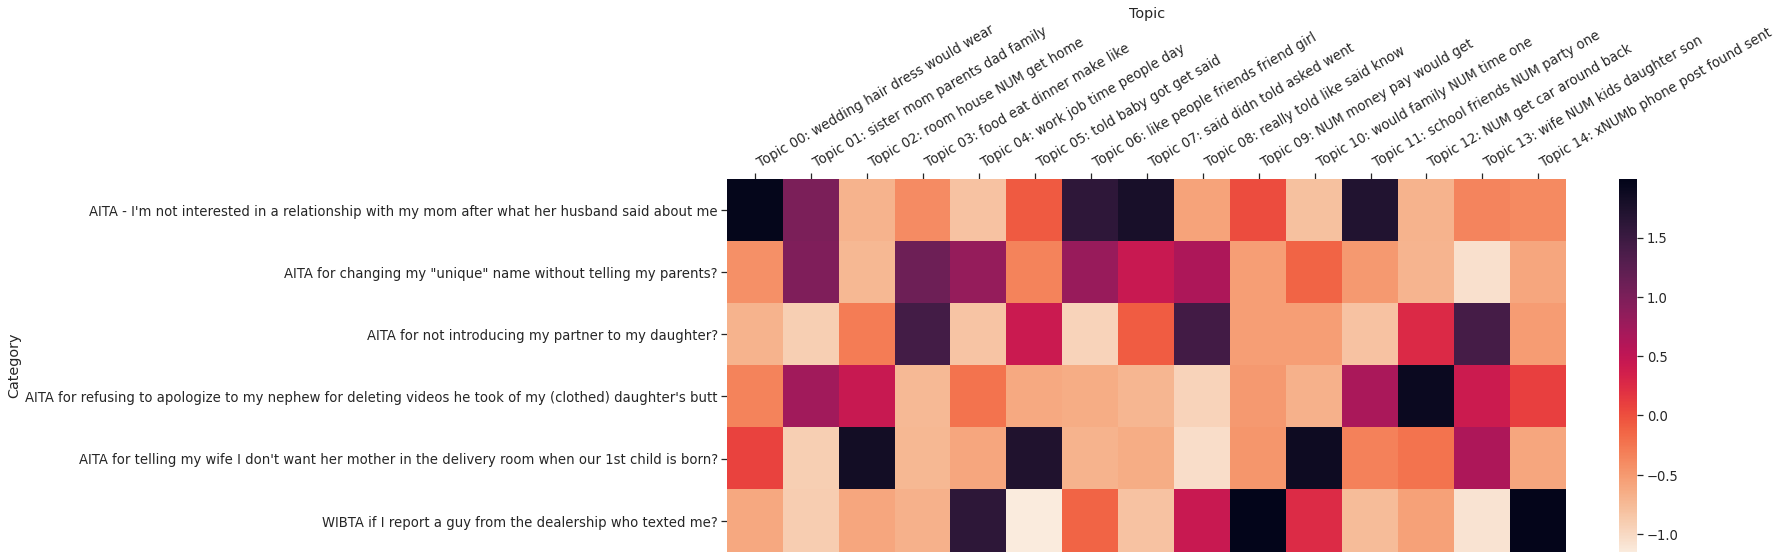

In [72]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(df['title'],
                                      topic_doc_distribution,
                                      topic_words, 
                                      'data/topic_modeling/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (25, 8)
                                     )

##### Which documents are most about topic X?

**Question:** Which Little Mallet Wrapper function do you think will get this for us?

<details>
<summary>Solution</summary>
   https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md#get_top_docstraining_data-topic_distributions-topic_index-n5

</details>


In [75]:
pd.DataFrame(np.array(topic_doc_distribution))[0].argmax()

1127

In [80]:
little_mallet_wrapper.get_top_docs(df['training_data'], topic_doc_distribution, 11, n=5)

[(0.6026936026936026,
  'organising camping trip invited lot friends couple tents lend treated spots tents first come first serve weekend tents planned like big dome tent guy tent two guys sleeping room one big dome tent girl tent two girls sleeping room one julie little tent friend julie tent would sleeping alone could fit two snugly wanted sleep alone little tent tent sleeping alone could also fit two tightly friend jess wanted come bring boyfriend said room tents could sleep girls guys said get tent couple would weird boyfriend sleep two guys never met said treating tent spots first come first serve everyone already picked spots like julie get two person tents said julie bought tent since organising trip supplying almost everything took first dibs picked favorite tiny tent wanted julie share give one tents boyfriend one join big girl tent give tent said wanted tent two much could get cheap one walmart weekend didn want change tent arrangements told everyone weeks tent arrangements f

In [79]:
topic_words[11]

['school',
 'friends',
 'NUM',
 'party',
 'one',
 'birthday',
 'told',
 'year',
 'would',
 'get',
 'didn',
 'going',
 'said',
 'got',
 'friend',
 'like',
 'day',
 'last',
 'high',
 'know']

In [81]:
training_data_reddit_titles = dict(zip(df['training_data'], df['title']))
training_data_original_text = dict(zip(df['training_data'], df['selftext']))

def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topic_words[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(df['training_data'], topic_doc_distribution, 
                                                                    topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_reddit_titles[document] + "\n")
    return



In [82]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['wedding', 'hair', 'dress', 'would', 'wear', 'one', 'married', 'said', 'day', 'really', 'get', 'like', 'getting', 'want', 'ring', 'wearing', 'asked', 'didn', 'think', 'wanted']

0.578 AITA for asking my girlfriend to cover up her body hair (pubes) at a public pool?

0.5733 AITA for not including a bridesmaid in photographs because she wore a suit?

0.5471 AITA for giving my grandmother's ring to my daughter instead of my wife?

0.5312 AITA? I wore an accessory ring to work knowing that my co-worker has the same ring for her engagement ring.

0.5216 AITA for getting a tattoo before my brother's wedding?



In [83]:
display_top_titles_per_topic(topic_number=11, number_of_documents=5)

✨Topic 11✨

['school', 'friends', 'NUM', 'party', 'one', 'birthday', 'told', 'year', 'would', 'get', 'didn', 'going', 'said', 'got', 'friend', 'like', 'day', 'last', 'high', 'know']

0.6027 AITA for not giving a couple who's going camping with me a tent for two? And asking them to sleep in the girls tent and boys tent?

0.5704 WIBTA for cutting of my "friends" HBO access right before next week's Game of Thrones episode.

0.5181 WIBTA if I kicked these girls out of the troop?

0.4378 AITA for telling a STEM major to shut the fuck up?

0.4122 AITA for buying a birthday girl one present from both my twin girls?



In [86]:
display_top_titles_per_topic(topic_number=2, number_of_documents=5)

✨Topic 2✨

['room', 'house', 'NUM', 'get', 'home', 'time', 'night', 'like', 'sleep', 'bed', 'live', 'door', 'stuff', 'work', 'doesn', 'living', 'bathroom', 'apartment', 'place', 'girlfriend']

0.7741 WIBTA if I told my roommate his girlfriend is getting too comfortable in our home?

0.6558 WIBTA if I made my roommate hold her pee in?

0.6487 AITA for leaving my sisters dirty underwear in a place her boyfriend could see?

0.6308 WIBTA if I shut my bedroom door against my aunts wishes

0.6237 AITA for telling my gf she’s not allowed to eat sugary snacks in our bed anymore?



#### Exploring Topics Words in Context

Look at online textbook - https://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-CSV.html#load-topic-distributions

#### Plot Topics Over Time

Instead of plotting the sentiment of Trump's tweets over time, we can plot the prevelance of different topics over time.

**In class discussion:** How could we plot the topics over time? What steps would we have to take?



Look at online textbook for an example: https://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Time-Series.html#plot-topics-over-time

#### Progression of Topics During a Narrative

Which Little Mallet Wrapper function does that for us?


<details>
<summary>Solution</summary>
  https://github.com/maria-antoniak/little-mallet-wrapper/blob/master/README.md#plot_topics_over_timetopic_distributions-topic_keys-times-topic_index-output_pathnone
    
    <br><br>
    <i>little_mallet_wrapper.plot_topics_over_time(topic_distributions, topic_keys, times, topic_index, output_path=None)</i>

    
    <br><br>
    This requires us first segmenting each post into chunks.
</details>

**Question:** Let's do this together